In [43]:
import math
import statistics
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy.stats as stats # type: ignore
from scipy.stats import norm # type: ignore
from matplotlib.patches import Rectangle # type: ignore
from math import cos, sin

In [44]:
data = "Session_28_06_2024_HR11_MIN12_SEC29.csv"
cls = ["TrackingStamp", "TimeStamp", "X", "Y", "Angle", "PosterNumber", "TrialStamp"]
df = pd.read_csv(data, skiprows=53, names=cls)
stamp, time, x, y, yaw = np.loadtxt("BOUNDARIES.txt", skiprows=47, unpack = True)

# Create tuples with information of each poster 
posters = [
    (1, -12.27, -1.87, "Cat"), 
    (2, -2.77, 12.26, "Hippo"), 
    (3, 2.23, -1.87, "Fox"), 
    (4, 2.23, 7.63, "Rabbit"), 
    (5, -12.27, 17.13, "Crocodile"), 
    (6, -12.27, 7.63, "Pig")
    ]

x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)
dfs = []
index = df.index[df['TrialStamp'] == 1].tolist() 
index = [0] + index + [len(df)]
for i in range(len(index) - 1):
    starting_index = index[i]
    ending_index = index[i+1]
    new_df = df.iloc[starting_index:ending_index]
    dfs.append(new_df)
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:\n{df}\n")
if dfs:
    dfs.pop(0)


DataFrame 1:
    TrackingStamp  TimeStamp     X    Y  Angle  PosterNumber  TrialStamp
0               0   0.016955 -7.07 -4.8    0.0             0           0
1               0   0.020000 -7.07 -4.8    0.0             0           0
2               0   0.017259 -7.07 -4.8    0.0             0           0
3               0   0.016544 -7.07 -4.8    0.0             0           0
4               0   0.016503 -7.07 -4.8    0.0             0           0
5               0   0.016602 -7.07 -4.8    0.0             0           0
6               0   0.016788 -7.07 -4.8    0.0             0           0
7               0   0.016605 -7.07 -4.8    0.0             0           0
8               0   0.017004 -7.07 -4.8    0.0             0           0
9               0   0.016565 -7.07 -4.8    0.0             0           0
10              0   0.016611 -7.07 -4.8    0.0             0           0
11              0   0.016543 -7.07 -4.8    0.0             0           0
12              0   0.016631 -7.07 -4.

In [45]:
n_plots = len(dfs)
n_cols = 6
n_rows = math.ceil(n_plots/n_cols)
poster_animal = ""
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 8))
axes = axes.flatten()

for i, (df, ax) in enumerate(zip(dfs, axes)):
    poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (poster_number == 1):
        poster_animal = "Cat"
    elif (poster_number == 2):
        poster_animal = "Hippo"
    elif (poster_number == 3):
        poster_animal = "Fox"
    elif (poster_number == 4):
        poster_animal = "Rabbit"
    elif (poster_number == 5):
        poster_animal = "Crocodile"
    elif (poster_number == 6):
        poster_animal = "Pig"
        
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.scatter(df[sorted("X")], df[sorted("Y")], marker = '.')
    ax.set_title(f'Trial {i + 1} (Poster {poster_animal})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [46]:
dfs1 = []
dfs2 = []
dfs3 = []
dfs4 = []
dfs5 = []
dfs6 = []
for df in dfs:
    select_poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (select_poster_number == 1):
        dfs1.append(df)
    elif (select_poster_number == 2):
        dfs2.append(df)
    elif (select_poster_number == 3):
        dfs3.append(df)
    elif (select_poster_number == 4):
        dfs4.append(df)
    elif (select_poster_number == 5):
        dfs5.append(df)
    elif (select_poster_number == 6):
        dfs6.append(df)
dfs_lists = [dfs1, dfs2, dfs3, dfs4, dfs5, dfs6]

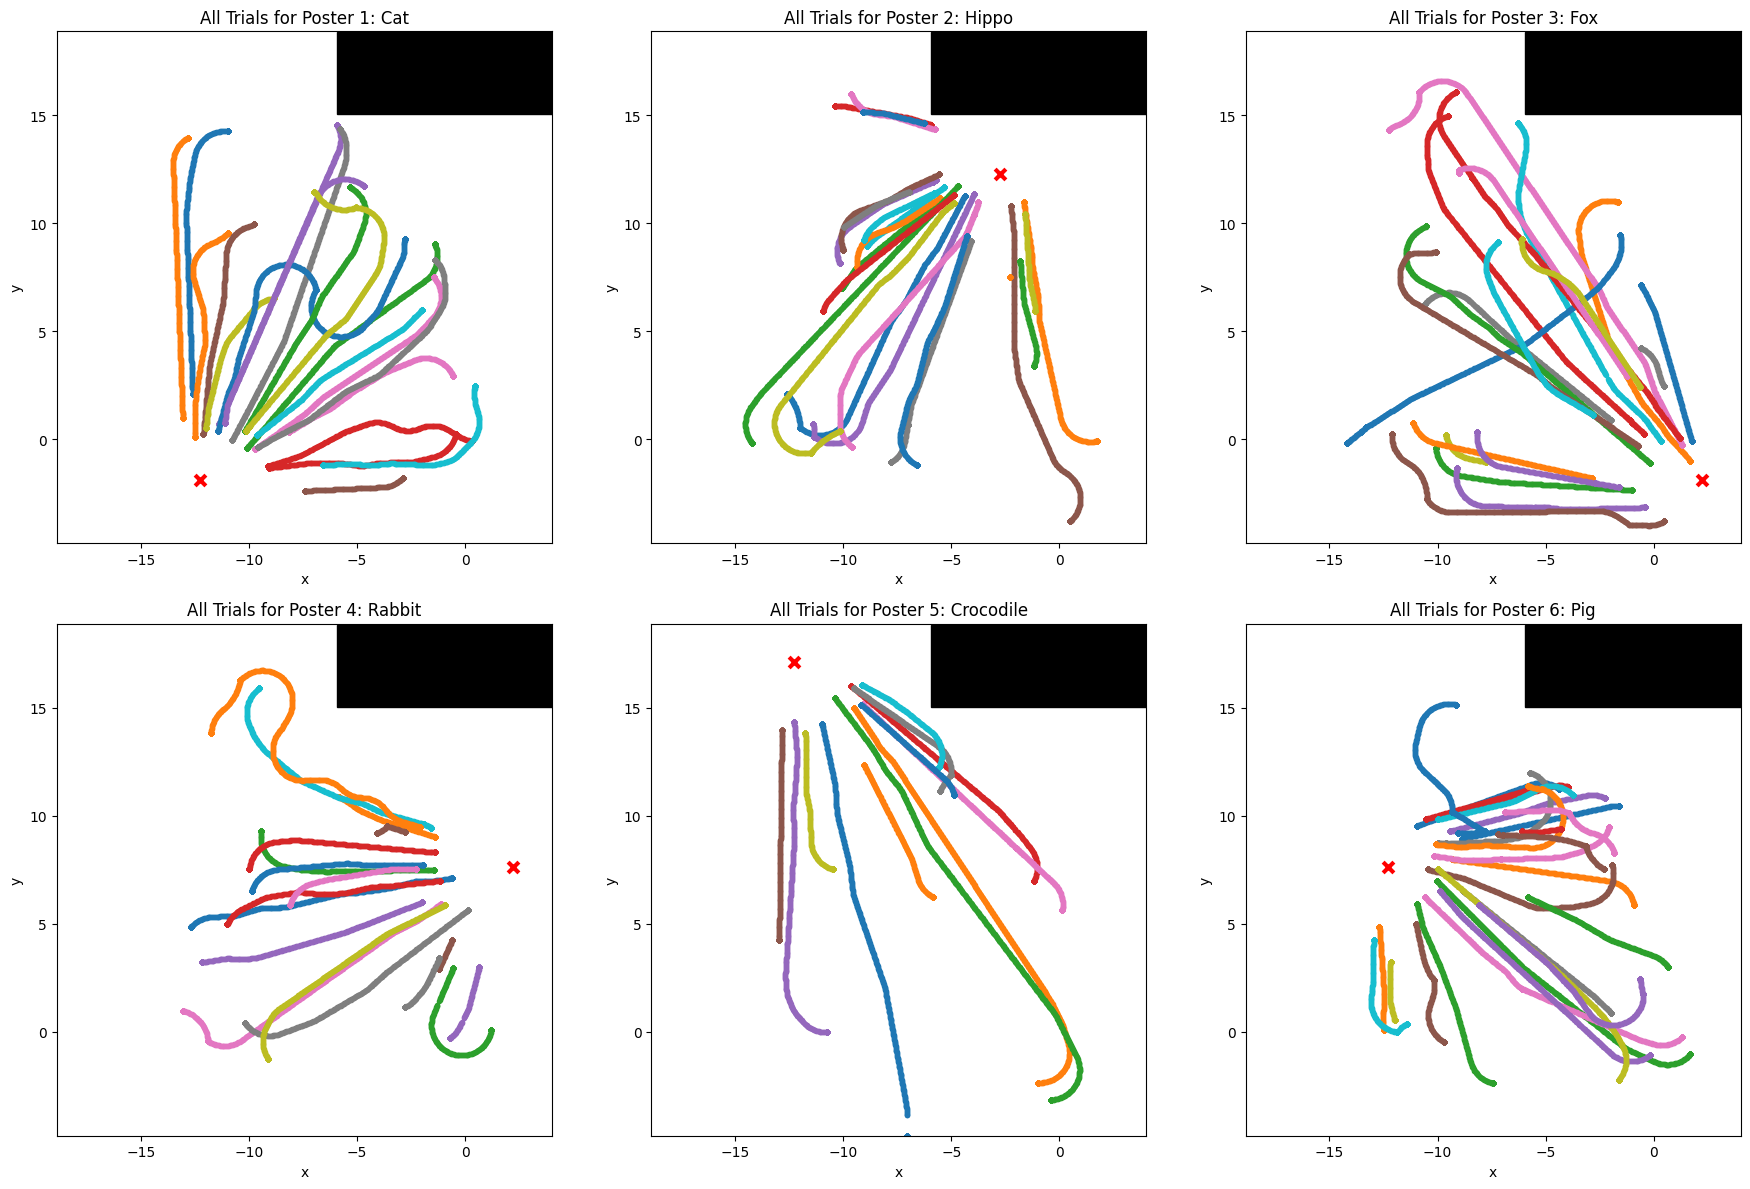

In [47]:
def plot_all(ax, dfs, tuple):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]

    for i, df in enumerate(dfs):
        ax.scatter(df['X'], df['Y'], marker = '.', label = f'Trial {i + 1}')
   
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster in zip(axes, dfs_lists, posters):
    plot_all(ax, dfs_list, poster)

plt.tight_layout()
plt.show()
#add green or red dot for correct 

In [48]:
x_values_sets = []
y_values_sets = []
angles_values_sets = []

for dfs_set in dfs_lists:
    x_values = []
    y_values = []
    angles = []
    for df in dfs_set: 
        filtered_df = df.loc[(df['TrialStamp'] == 3) | (df['TrialStamp'] == 4)]

        if not filtered_df.empty: 
            x_values.extend(filtered_df['X'].tolist())
            y_values.extend(filtered_df['Y'].tolist())
            angles.extend(filtered_df['Angle'].tolist())
    x_values_sets.append(x_values)
    y_values_sets.append(y_values)
    angles_values_sets.append(angles)

In [49]:
euclidean_distances = []
# add x and y data separately (add variance stats of each axis)
def euclidean_distance_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    errors = []
    
    for x, y in zip(x_values, y_values):
        euclidean_error = math.sqrt((target_x - x) ** 2 + (target_y - y) ** 2)
        errors.append(euclidean_error)
    euclidean_distance = sum(errors) / len(errors)
    return euclidean_distance

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    distance = round(euclidean_distance_error(x_values, y_values, poster),5)
    euclidean_distances.append(distance)

for i, distance in enumerate(euclidean_distances):
    print(f"Euclidean distance for {posters[i][3]}: {distance}")

Euclidean distance for Cat: 3.19087
Euclidean distance for Hippo: 2.89263
Euclidean distance for Fox: 4.48821
Euclidean distance for Rabbit: 4.18823
Euclidean distance for Crocodile: 3.41805
Euclidean distance for Pig: 3.39862


In [50]:
mean_absolute_errors = []

def mean_absolute_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    abs_errors = []
    
    for x, y in zip(x_values, y_values):
        absolute_error = abs(target_x - x) + abs(target_y - y)
        abs_errors.append(absolute_error)
    mean_absolute_error = sum(abs_errors) / len(abs_errors)
    return mean_absolute_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    absolute = round(mean_absolute_error(x_values, y_values, poster),5)
    mean_absolute_errors.append(absolute) 
    
for i, absolute in enumerate(mean_absolute_errors):
    print(f"Mean Absolute Error for {posters[i][3]}: {absolute}")

Mean Absolute Error for Cat: 3.98557
Mean Absolute Error for Hippo: 3.69232
Mean Absolute Error for Fox: 5.5741
Mean Absolute Error for Rabbit: 5.29074
Mean Absolute Error for Crocodile: 4.44386
Mean Absolute Error for Pig: 4.30443


In [51]:
root_mean_square_errors = []

def root_mean_square_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    rmse_errors = []
    
    for x, y in zip(x_values, y_values):
        root_mean_square_error = (target_x - x) ** 2 + (target_y - y) ** 2
        rmse_errors.append(root_mean_square_error)
    rmse_error = math.sqrt(sum(rmse_errors) / len(rmse_errors))
    return rmse_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    rmse_error = round(root_mean_square_error(x_values, y_values, poster),5)
    root_mean_square_errors.append(rmse_error) 
    
for i, rmse_error in enumerate(root_mean_square_errors):
    print(f"Root Mean Square Error for {posters[i][3]}: {rmse_error}")

Root Mean Square Error for Cat: 3.32462
Root Mean Square Error for Hippo: 3.04384
Root Mean Square Error for Fox: 5.62308
Root Mean Square Error for Rabbit: 4.25701
Root Mean Square Error for Crocodile: 3.5079
Root Mean Square Error for Pig: 3.6377


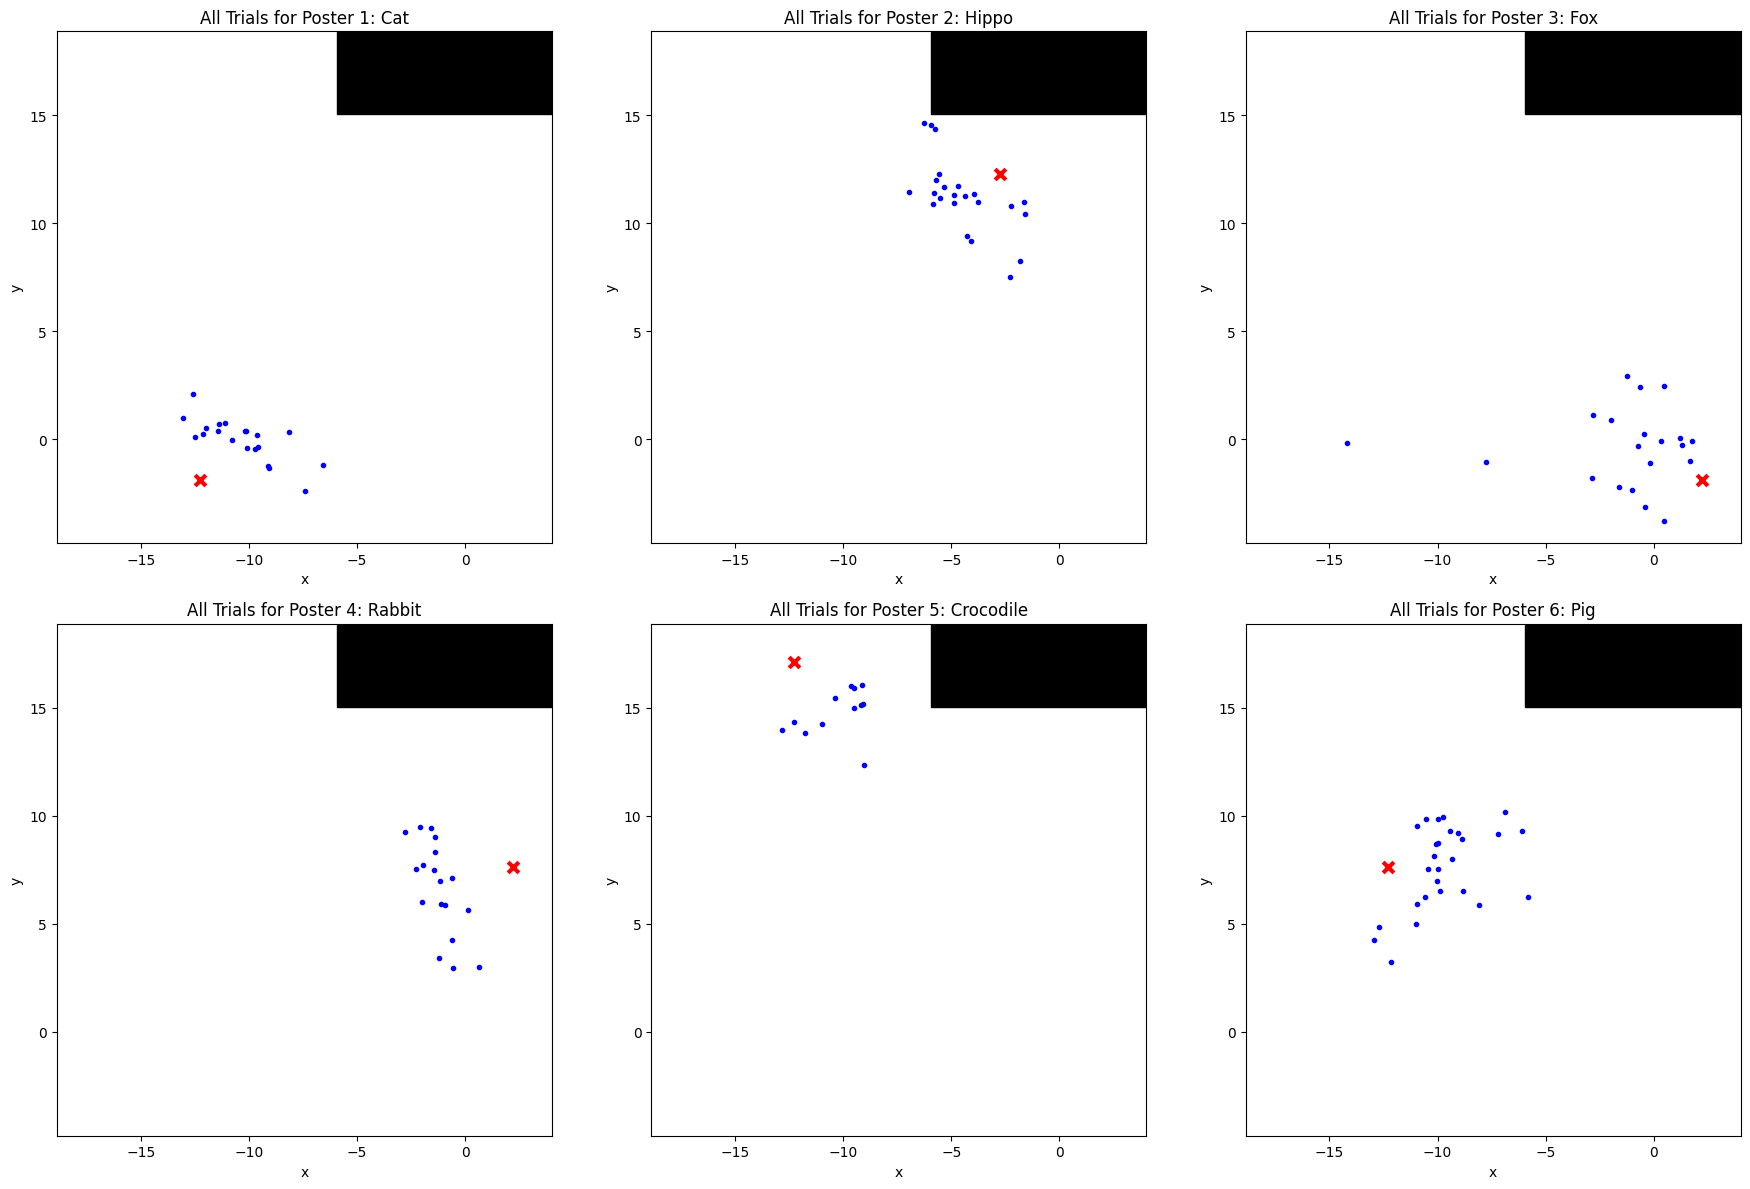

In [52]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for x, y in zip(x_values, y_values):
        ax.scatter(x, y, marker = '.', color='blue')

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')


fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()

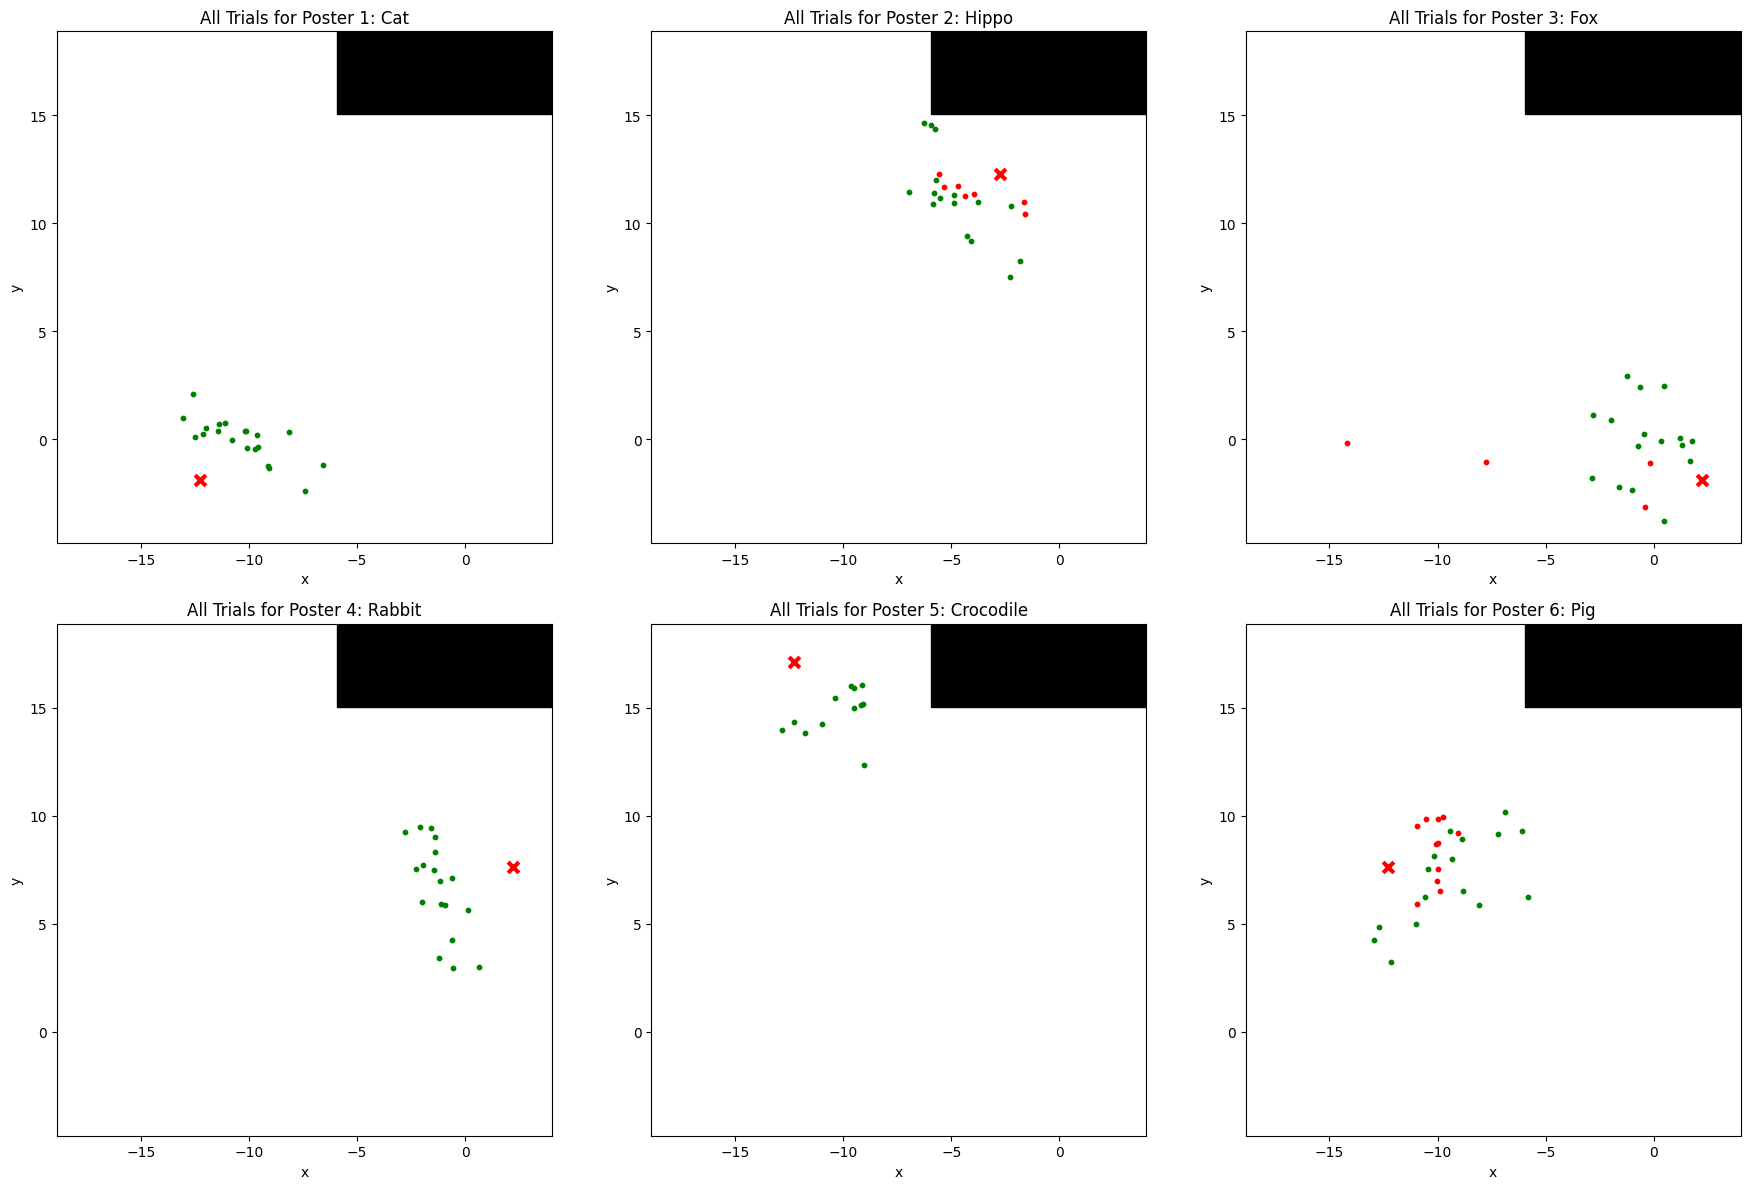

In [53]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for df, x, y in zip(dfs, x_values, y_values):
        if 4 in df['TrialStamp'].values:
            ax.scatter(x, y, marker='.', color='red', s=40)
        else:
            ax.scatter(x, y, marker='.', color='green', s=40)

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()

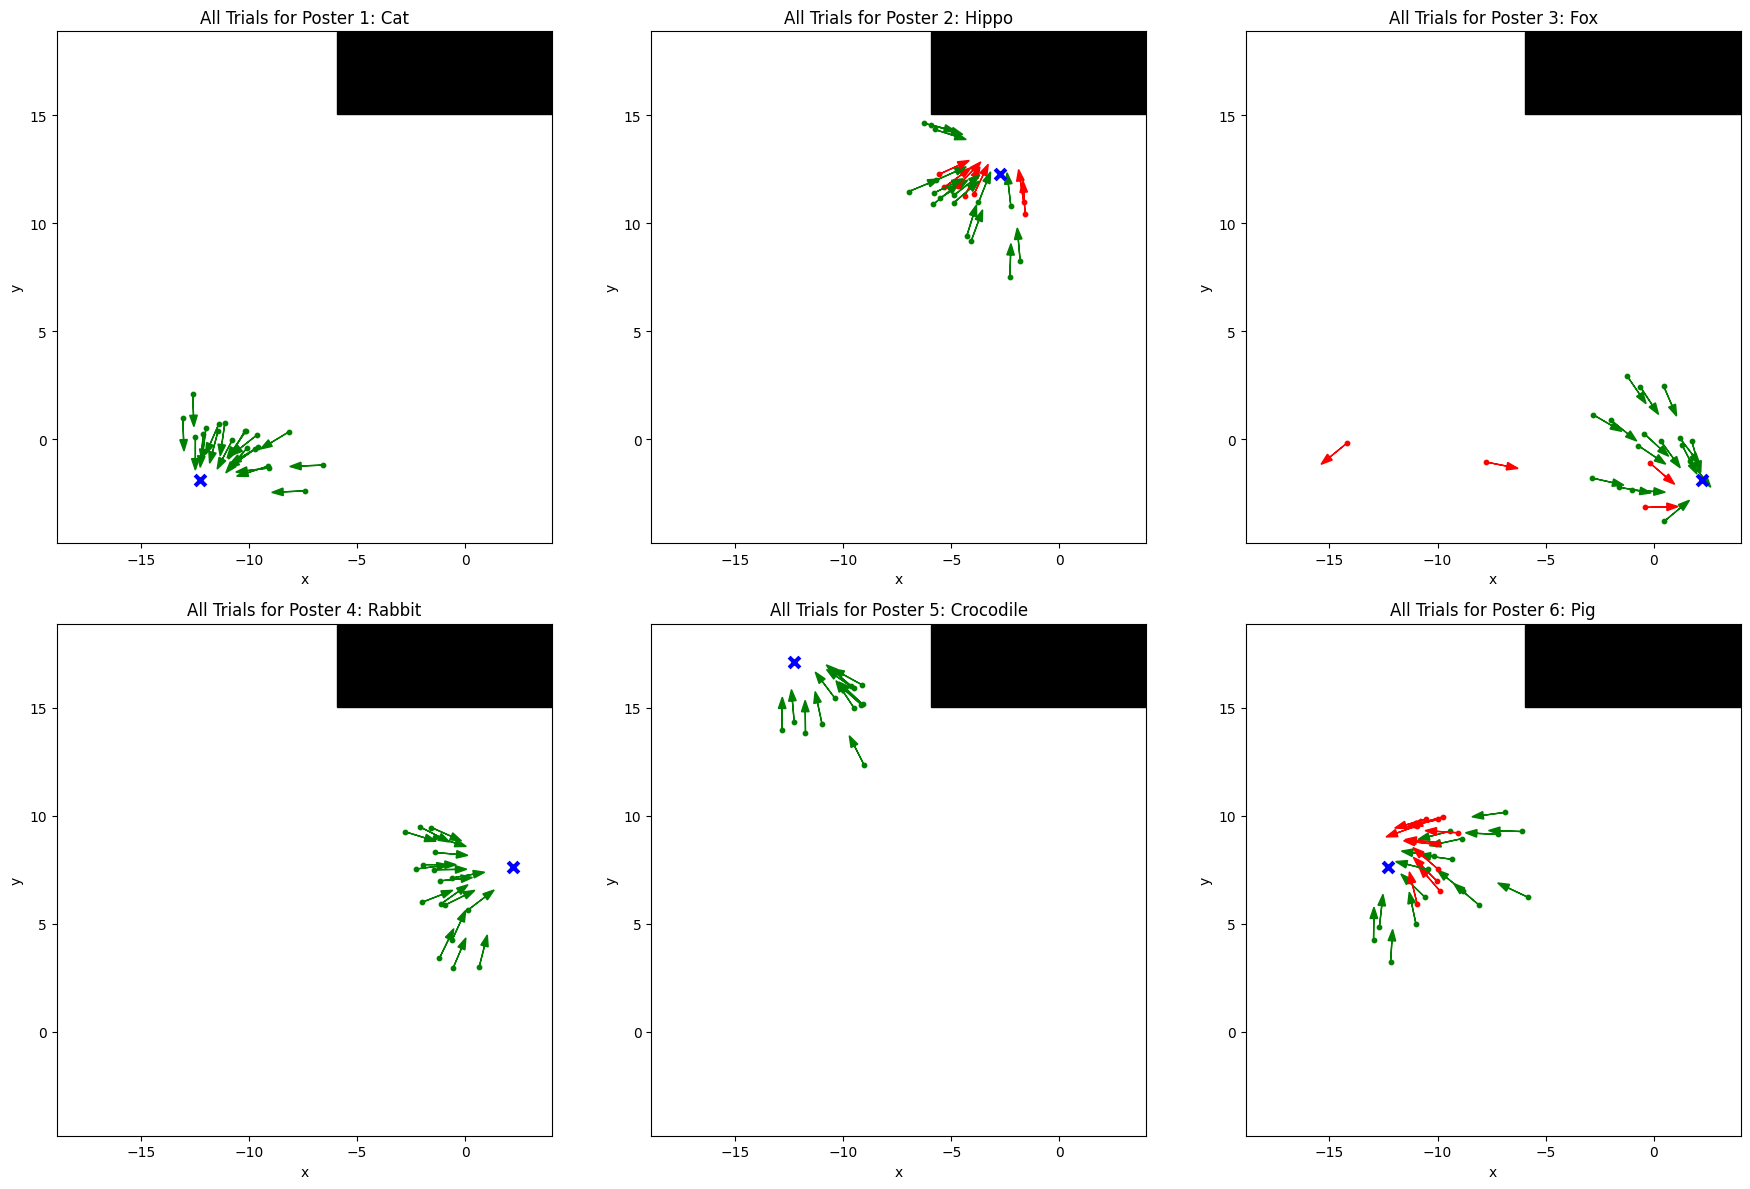

In [54]:
def plot_all(ax, dfs, tuple, x_values, y_values, angles):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for df, x, y, angle in zip(dfs, x_values, y_values, angles):
        if 4 in df['TrialStamp'].values:
            ax.scatter(x, y, marker='.', color='red', s=40)  
            angle_rad = np.deg2rad(angle)
            ax.arrow(x, y, sin(angle_rad), cos(angle_rad), color='red', head_width=0.35)
        else:
            ax.scatter(x, y, marker='.', color='green', s=40)
            angle_rad = np.deg2rad(angle)
            ax.arrow(x, y, sin(angle_rad), cos(angle_rad), color='green', head_width=0.35)

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))

    ax.scatter(target_x, target_y, color='blue', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values, angles in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets, angles_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values, angles)

plt.tight_layout()
plt.show()

Some things to be noted: 

Every now and then after you get a poster wrong, the sim would rotate your character as if you were in the death scene while you are controlling your character. This can be seen in some of the graphs at the very top, where there is a random curved path towards the wall instead of towards a poster. Specifically trials 127 and 136. 

In Poster 3 and 4, there are two dots that look as if they were going to other posters. This is because of the fact that in some instances, the poster would disappear from the top, which could be significant in data collection if it happens to the monkey. 

There look to be come inconsistencies with what is tracked as a success or failure. Specifically with fox, one of the closest points is red due to the angle being slightly off. 

In [55]:
def basic_x_stats(dfs, tuple, x_vals): # Replicates 1-var stats on a Ti-84
    poster_num, target_x, animal = tuple[0], tuple[1], tuple[3]
    x_diffs = []

    for x in x_vals:
        x_diff = round((x - target_x),5)
        x_diffs.append(x_diff)
    mean_x = round(statistics.mean(x_diffs),5)

    x_sum_squares = []
    for x_diff in x_diffs:
        x_square_diff = (x_diff - mean_x) ** 2
        x_sum_squares.append(x_square_diff)

    sum_x = round(sum(x_diffs),5)
    x_sum_of_squares = round(sum(x_sum_squares),5)
    std_x, variance_x, pop_std_x = round(statistics.stdev(x_diffs),5), round(statistics.variance(x_diffs),5), round(statistics.pstdev(x_diffs),5)
    quantiles_x = statistics.quantiles(x_diffs, n=4), 
    print(f'Mean of x for Poster {poster_num}: {animal}:', mean_x)
    print(f'Sum of x for Poster {poster_num}: {animal}:', sum_x)
    print(f'Sum of squares of x for Poster {poster_num}: {animal}:', x_sum_of_squares)
    print(f'Standard deviation of x for Poster {poster_num}: {animal}:', std_x)
    print(f'Variance of x for Poster {poster_num}: {animal}:', variance_x)
    print(f'Population standard deviation of x for Poster {poster_num}: {animal}:', pop_std_x)
    print(f'Quartiles of x for Poster {poster_num}: {animal}:', quantiles_x)

    print()
    
def basic_y_stats(dfs, tuple, y_vals): # Replicates 1-var stats on a Ti-84
    poster_num, target_y, animal = tuple[0], tuple[2], tuple[3]
    y_diffs = []

    for y in y_vals:
        y_diff = round((y - target_y),5)
        y_diffs.append(y_diff)
    mean_y = round(statistics.mean(y_diffs),5)

    y_sum_squares = []
    for y_diff in y_diffs:
        y_square_diff = (y_diff - mean_y) ** 2
        y_sum_squares.append(y_square_diff)

    sum_y = round(sum(y_diffs),5)
    y_sum_of_squares = round(sum(y_sum_squares),5)
    std_y, variance_y, pop_std_y = round(statistics.stdev(y_diffs),5), round(statistics.variance(y_diffs),5), round(statistics.pstdev(y_diffs),5)
    # n_y, min_y, max_y = len(y_diffs), min(y_diffs), max(y_diffs)
    quantiles_y = statistics.quantiles(y_diffs, n=4), 

    print(f'Mean of y for Poster {poster_num}: {animal}:', mean_y)
    print(f'Sum of y for Poster {poster_num}: {animal}:', sum_y)
    print(f'Sum of squares of y for Poster {poster_num}: {animal}:', y_sum_of_squares)
    print(f'Standard deviation of y for Poster {poster_num}: {animal}:', std_y)
    print(f'Variance of y for Poster {poster_num}: {animal}:', variance_y)
    print(f'Population standard deviation of y for Poster {poster_num}: {animal}:', pop_std_y)
    print(f'Quartiles of y for Poster {poster_num}: {animal}:', quantiles_y)
    print()
for dfs_list, poster, x_values in zip(dfs_lists, posters, x_values_sets):
    basic_x_stats(dfs_list, poster, x_values)
print()
for dfs_list, poster, y_values in zip(dfs_lists, posters, y_values_sets):
    basic_y_stats(dfs_list, poster, y_values)

Mean of x for Poster 1: Cat: 1.94027
Sum of x for Poster 1: Cat: 38.8054
Sum of squares of x for Poster 1: Cat: 58.09061
Standard deviation of x for Poster 1: Cat: 1.74854
Variance of x for Poster 1: Cat: 3.0574
Population standard deviation of x for Poster 1: Cat: 1.70427
Quartiles of x for Poster 1: Cat: ([0.422875, 2.1130500000000003, 3.0416749999999997],)

Mean of x for Poster 2: Hippo: -1.71529
Sum of x for Poster 2: Hippo: -39.4517
Sum of squares of x for Poster 2: Hippo: 55.90248
Standard deviation of x for Poster 2: Hippo: 1.59406
Variance of x for Poster 2: Hippo: 2.54102
Population standard deviation of x for Poster 2: Hippo: 1.55902
Quartiles of x for Poster 2: Hippo: ([-2.9936, -2.1038, -0.9718],)

Mean of x for Poster 3: Fox: -3.65733
Sum of x for Poster 3: Fox: -73.1466
Sum of squares of x for Poster 3: Fox: 257.44151
Standard deviation of x for Poster 3: Fox: 3.68097
Variance of x for Poster 3: Fox: 13.54955
Population standard deviation of x for Poster 3: Fox: 3.58777
Q

In [56]:
def cord_stats(dfs, tuple, x_vals, y_vals): 
    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    displacements = [] 
    for x, y, in zip(x_vals, y_vals):
        dx = target_x - x
        dy = target_y - y 
        displacement = round((dx**2 + dy**2) ** 0.5,5)
        displacements.append(displacement)
    mean = round(statistics.mean(displacements),5)
    std, variance, pop_std = round(statistics.stdev(displacements),5), round(statistics.variance(displacements),5), round(statistics.pstdev(displacements),5)
    quartiles = statistics.quantiles(displacements, n=4), 

    print(f'Mean of displacements for Poster {poster_num}: {animal}:', mean)
    print(f'Standard deviation of displacements for Poster {poster_num}: {animal}:', std)
    print(f'Variance of displacements for Poster {poster_num}: {animal}:', variance)
    print(f'Population standard deviation of displacements for Poster {poster_num}: {animal}:', pop_std)
    print(f'Quartiles of displacements for Poster {poster_num}: {animal}:', quartiles)
    print()
for dfs_list, poster, x_values, y_values in zip(dfs_lists, posters, x_values_sets, y_values_sets):
    cord_stats(dfs_list, poster, x_values, y_values)

Mean of displacements for Poster 1: Cat: 3.19087
Standard deviation of displacements for Poster 1: Cat: 0.95774
Variance of displacements for Poster 1: Cat: 0.91726
Population standard deviation of displacements for Poster 1: Cat: 0.93349
Quartiles of displacements for Poster 1: Cat: ([2.4772475, 3.02975, 3.3311025],)

Mean of displacements for Poster 2: Hippo: 2.89262
Standard deviation of displacements for Poster 2: Hippo: 0.96876
Variance of displacements for Poster 2: Hippo: 0.93851
Population standard deviation of displacements for Poster 2: Hippo: 0.94747
Quartiles of displacements for Poster 2: Hippo: ([1.98675, 2.94376, 3.64396],)

Mean of displacements for Poster 3: Fox: 4.48821
Standard deviation of displacements for Poster 3: Fox: 3.47548
Variance of displacements for Poster 3: Fox: 12.07897
Population standard deviation of displacements for Poster 3: Fox: 3.38748
Quartiles of displacements for Poster 3: Fox: ([2.5574274999999997, 3.370305, 5.14414],)

Mean of displacements 

In [57]:
def angle_diff(theta1, theta2):
    theta = abs(theta1 - theta2) % 360
    return min(theta, 360 - theta)

def angle_error(tuple, x_vals, y_vals, angles):
    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    angles_errors = []
    for x, y, angle in zip(x_vals, y_vals, angles):
        
        dx = target_x - x
        dy = target_y - y 
        
        angle_calc = np.arctan2(dx, dy)
        angle_deg = np.degrees(angle_calc)
        angle_deg = (angle_deg + 360) % 360

        angle_difference = np.radians(angle_diff(angle_deg, angle))
        angles_errors.append(angle_difference)

    mean_angle = round(statistics.mean(angles_errors),5) 
    std, variance, pop_std = round(statistics.stdev(angles_errors),5), round(statistics.variance(angles_errors),5), round(statistics.pstdev(angles_errors),5)
    quartiles = statistics.quantiles(angles_errors, n=4) 
    print(f'Mean of angle error for Poster {poster_num}: {animal}:', mean_angle)
    print(f'Standard deviation of angle error for Poster {poster_num}: {animal}:', std)
    print(f'Variance of angle error for Poster {poster_num}: {animal}:', variance)
    print(f'Population standard deviation of angle error for Poster {poster_num}: {animal}:', pop_std)
    print(f'Quartiles of angle error for Poster {poster_num}: {animal}:', quartiles)
    print()
print('(In rads)')
for poster, x_values, y_values, angles in zip(posters, x_values_sets, y_values_sets, angles_values_sets):
    angle_error(poster, x_values, y_values, angles)

    

(In rads)
Mean of angle error for Poster 1: Cat: 0.1139
Standard deviation of angle error for Poster 1: Cat: 0.08618
Variance of angle error for Poster 1: Cat: 0.00743
Population standard deviation of angle error for Poster 1: Cat: 0.084
Quartiles of angle error for Poster 1: Cat: [np.float64(0.04637827265013937), np.float64(0.1031949961957743), np.float64(0.1897038345980919)]

Mean of angle error for Poster 2: Hippo: 0.30466
Standard deviation of angle error for Poster 2: Hippo: 0.14748
Variance of angle error for Poster 2: Hippo: 0.02175
Population standard deviation of angle error for Poster 2: Hippo: 0.14424
Quartiles of angle error for Poster 2: Hippo: [np.float64(0.18459779199033705), np.float64(0.2660819378979483), np.float64(0.4319261127321939)]

Mean of angle error for Poster 3: Fox: 0.24763
Standard deviation of angle error for Poster 3: Fox: 0.50971
Variance of angle error for Poster 3: Fox: 0.2598
Population standard deviation of angle error for Poster 3: Fox: 0.4968
Quarti

In [58]:
def angle_diff(theta1, theta2):
    theta = abs(theta1 - theta2) % 360
    return min(theta, 360 - theta)

def weighted_error(poster_info, x_vals, y_vals, angles):
    poster_num, target_x, target_y, animal = poster_info[0], poster_info[1], poster_info[2], poster_info[3]
    angles_errors = []
    displacements = []
    for x, y, angle in zip(x_vals, y_vals, angles):
        dx = target_x - x
        dy = target_y - y

        displacement = round((dx**2 + dy**2) ** 0.5,5)
        displacements.append(displacement)

        angle_calc = np.arctan2(dx, dy)
        angle_deg = np.degrees(angle_calc)
        angle_deg = (angle_deg + 360) % 360

        angle_difference = np.radians(angle_diff(angle_deg, angle))
        angles_errors.append(angle_difference)

    mean_angle_error = statistics.mean(angles_errors)
    mean_displacements = statistics.mean(displacements)
    weighted_error = (mean_angle_error + mean_displacements)
    print(f'Weighted error for Poster {poster_num}: {animal}:', round(weighted_error,5))
    
for poster, x_values, y_values, angles in zip(posters, x_values_sets, y_values_sets, angles_values_sets):
    weighted_error(poster, x_values, y_values, angles)

Weighted error for Poster 1: Cat: 3.30478
Weighted error for Poster 2: Hippo: 3.19728
Weighted error for Poster 3: Fox: 4.73584
Weighted error for Poster 4: Rabbit: 4.27325
Weighted error for Poster 5: Crocodile: 3.60602
Weighted error for Poster 6: Pig: 3.75465
